In [8]:
import os

prev = '../data_cache'
new  = '../data'

splits = os.listdir(prev)

In [17]:
import shutil

for split in splits:
    prev_folder = prev + '/' + split
    prev_input  = prev_folder + '/' + 'input'
    prev_water  = prev_folder + '/' + 'mask_watermark'
    prev_word   = prev_folder + '/' + 'mask_word'
    
    new_folder = new + '/' + split
    new_input  = new_folder + '/' + 'input'
    new_water  = new_folder + '/' + 'mask_watermark'
    new_word   = new_folder + '/' + 'mask_word'
    
    
    
    positives     = os.listdir(prev_water)
    num_positives = len(positives)
    num_negatives = 0
    
    for filename in sorted(os.listdir(prev_input), reverse=True):
        if filename in positives:
            # copy input, mask_water, mask_word
            shutil.copy2(prev_input + '/' + filename, new_input)
            shutil.copy2(prev_water + '/' + filename, new_water)
            shutil.copy2(prev_word + '/' + filename, new_word)

        else:
            if num_negatives >= num_positives:
                continue
            # copy input
            shutil.copy2(prev_input + '/' + filename, new_input)
            num_negatives += 1            

In [18]:
num_negatives

1414

In [4]:
import numpy as np

dictionary = np.load('watermark_scores_2.npy',allow_pickle='TRUE').item()

In [5]:
len(dictionary)

140

In [6]:
dictionary

{'12.jpg': array([], dtype=float32),
 '13.jpg': array([], dtype=float32),
 '15.jpg': array([], dtype=float32),
 '16.jpg': array([], dtype=float32),
 '17.jpg': array([], dtype=float32),
 'clean_Img_0001.jpg': array([], dtype=float32),
 'clean_Img_000126.jpg': array([], dtype=float32),
 'clean_Img_000130.jpg': array([], dtype=float32),
 'clean_Img_000142.jpg': array([], dtype=float32),
 'clean_Img_000152.jpg': array([], dtype=float32),
 'clean_Img_0002.jpg': array([], dtype=float32),
 'clean_Img_000203.jpg': array([], dtype=float32),
 'clean_Img_000211.jpg': array([], dtype=float32),
 'clean_Img_000238.jpg': array([], dtype=float32),
 'clean_Img_000252.jpg': array([], dtype=float32),
 'clean_Img_000256.jpg': array([], dtype=float32),
 'clean_Img_000291.jpg': array([], dtype=float32),
 'clean_Img_0003.jpg': array([], dtype=float32),
 'clean_Img_000309.jpg': array([], dtype=float32),
 'clean_Img_000378.jpg': array([], dtype=float32),
 'clean_Img_000379.jpg': array([], dtype=float32),
 'cle

In [4]:
from sklearn.metrics import precision_recall_curve

y_true = []
probas_pred = []

for key in dictionary.keys():
    if 'watermarked' in key:
        y_true.append(1)
    else:
        y_true.append(0)
    if list(dictionary[key]):
        probas_pred.append(dictionary[key][0])
    else:
        probas_pred.append(0)

precision, recall, thresholds = precision_recall_curve(y_true, probas_pred)

In [5]:
thresholds

array([0.5140064 , 0.5365002 , 0.54553926, 0.55215377, 0.5547799 ,
       0.5613264 , 0.57861733, 0.61686534, 0.6354839 , 0.6567641 ,
       0.6640906 , 0.67429835, 0.6794494 , 0.68271476, 0.6859383 ,
       0.6928714 , 0.7015355 , 0.70700485, 0.7072446 , 0.71114165,
       0.7203204 , 0.72303796, 0.7308015 , 0.7446952 , 0.7473262 ,
       0.7487566 , 0.75107265, 0.7548405 , 0.75643754, 0.7583742 ,
       0.75957906, 0.76279104, 0.76550585, 0.76869464, 0.76959246,
       0.7699542 , 0.770191  , 0.77109766, 0.7712631 , 0.7718184 ,
       0.77409196, 0.774443  , 0.7749734 , 0.7758725 , 0.77656406,
       0.7810629 , 0.7818347 , 0.78347015, 0.78407043, 0.7850067 ,
       0.785527  , 0.7857675 , 0.786361  , 0.7880547 , 0.78862536,
       0.79015064, 0.7920035 , 0.7924346 , 0.7964696 , 0.79972315,
       0.80371946, 0.8050728 , 0.8078349 , 0.81267095, 0.8150049 ,
       0.8196502 , 0.82084155, 0.82212913, 0.82266766, 0.8236846 ,
       0.8240374 , 0.82720786, 0.8286857 , 0.8319538 , 0.83235

In [6]:
precision

array([0.25      , 0.24460432, 0.24637681, 0.24087591, 0.23529412,
       0.22962963, 0.2238806 , 0.21804511, 0.21212121, 0.20610687,
       0.20769231, 0.20930233, 0.203125  , 0.20472441, 0.20634921,
       0.208     , 0.2016129 , 0.20325203, 0.19672131, 0.19834711,
       0.19166667, 0.19327731, 0.19491525, 0.1965812 , 0.18965517,
       0.19130435, 0.19298246, 0.19469027, 0.19642857, 0.1981982 ,
       0.2       , 0.20183486, 0.19444444, 0.19626168, 0.18867925,
       0.19047619, 0.18269231, 0.18446602, 0.18627451, 0.18811881,
       0.19      , 0.19191919, 0.19387755, 0.19587629, 0.19791667,
       0.2       , 0.19148936, 0.19354839, 0.18478261, 0.17582418,
       0.17777778, 0.17977528, 0.18181818, 0.17241379, 0.1744186 ,
       0.16470588, 0.1547619 , 0.15662651, 0.15853659, 0.14814815,
       0.1375    , 0.13924051, 0.14102564, 0.14285714, 0.14473684,
       0.13333333, 0.13513514, 0.1369863 , 0.13888889, 0.14084507,
       0.12857143, 0.13043478, 0.13235294, 0.13432836, 0.13636

In [7]:
recall

array([1.        , 0.97142857, 0.97142857, 0.94285714, 0.91428571,
       0.88571429, 0.85714286, 0.82857143, 0.8       , 0.77142857,
       0.77142857, 0.77142857, 0.74285714, 0.74285714, 0.74285714,
       0.74285714, 0.71428571, 0.71428571, 0.68571429, 0.68571429,
       0.65714286, 0.65714286, 0.65714286, 0.65714286, 0.62857143,
       0.62857143, 0.62857143, 0.62857143, 0.62857143, 0.62857143,
       0.62857143, 0.62857143, 0.6       , 0.6       , 0.57142857,
       0.57142857, 0.54285714, 0.54285714, 0.54285714, 0.54285714,
       0.54285714, 0.54285714, 0.54285714, 0.54285714, 0.54285714,
       0.54285714, 0.51428571, 0.51428571, 0.48571429, 0.45714286,
       0.45714286, 0.45714286, 0.45714286, 0.42857143, 0.42857143,
       0.4       , 0.37142857, 0.37142857, 0.37142857, 0.34285714,
       0.31428571, 0.31428571, 0.31428571, 0.31428571, 0.31428571,
       0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
       0.25714286, 0.25714286, 0.25714286, 0.25714286, 0.25714

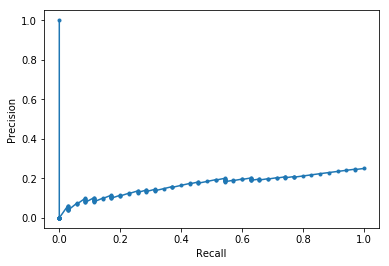

In [10]:
import matplotlib.pyplot as plt

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [16]:
both = [precision[i] + recall[i] for i in range(len(recall))]

In [17]:
both

[1.25,
 1.216032887975334,
 1.2178053830227744,
 1.183733055265902,
 1.149579831932773,
 1.1153439153439153,
 1.0810234541577826,
 1.0466165413533834,
 1.0121212121212122,
 0.9775354416575791,
 0.9791208791208792,
 0.9807308970099669,
 0.9459821428571429,
 0.9475815523059617,
 0.9492063492063492,
 0.9508571428571428,
 0.9158986175115207,
 0.9175377468060395,
 0.8824355971896956,
 0.8840613931523023,
 0.8488095238095238,
 0.8504201680672269,
 0.8520581113801453,
 0.8537240537240537,
 0.8182266009852217,
 0.8198757763975155,
 0.8215538847117794,
 0.8232616940581542,
 0.825,
 0.8267696267696267,
 0.8285714285714285,
 0.8304062909567497,
 0.7944444444444444,
 0.7962616822429907,
 0.7601078167115902,
 0.7619047619047619,
 0.7255494505494505,
 0.7273231622746186,
 0.7291316526610644,
 0.730975954738331,
 0.7328571428571429,
 0.7347763347763347,
 0.736734693877551,
 0.7387334315169366,
 0.7407738095238094,
 0.7428571428571429,
 0.7057750759878418,
 0.7078341013824885,
 0.6704968944099379,
 0.

In [18]:
both.index(max(both))

0

In [19]:
thresholds[0]

0.5140064

In [4]:
import numpy as np

x = np.arange(0.5, 1, 0.01)
watermark_binned_scores = [0 for _ in range(len(x))]
clean_binned_scores = [0 for _ in range(len(x))]

for key in dictionary.keys():
    if list(dictionary[key]):
        idx = int(round(dictionary[key][0] * 100)) - 50
        if 'watermarked' in key:
            watermark_binned_scores[idx] += 1
        else:
            clean_binned_scores[idx] += 1

In [5]:
sum(clean_binned_scores), sum(watermark_binned_scores)

(105, 35)

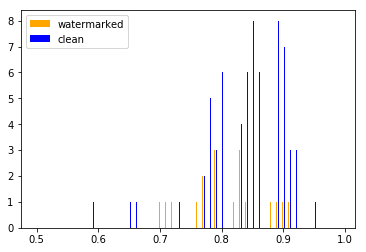

In [7]:
import matplotlib.pyplot as plt

plt.bar(x-0.001, watermark_binned_scores, width=0.001, color='orange', label='watermarked')
plt.bar(x+0.002, clean_binned_scores, width=0.001, color='blue', label='clean')
plt.legend()
plt.show()

In [8]:
thres = 0.85

TP = 0
FN = 0
FP = 0
TN = 0

for key in dictionary.keys():
    if 'clean' in key:
        if any(dictionary[key] > thres):
            FP += 1
        else:
            TN += 1
    else:
        if any(dictionary[key] > thres):
            TP += 1
        else:
            FN += 1
            
print("TP: ", TP)
print("FN: ", FN)
print("TN: ", TN)
print("FP: ", FP)
print("Weighted Accuracy: ", (TP/2*5 + TN) / ((TN + FP) * 2))
print("TP %: ", TP / (TP+FN))
print("TN %: ", TN / (TN+FP))

TP:  14
FN:  26
TN:  59
FP:  41
Weighted Accuracy:  0.47
TP %:  0.35
TN %:  0.59
